In [4]:

package 'HAPSystemContext' {

    // Define the HAP system in the problem domain as a black box
    part def HAPSystem;

    // Define sensor and signal ports
    port def SensorPort {
        out item envData;  // Sensor data output
    }

    port def SignalPort {
        in item alertSignal;  // Incoming alert signal
    }

    // Define an interface for monitoring environmental changes
    interface def MonitoringInterface {
        end sensorInput : SensorPort;   // Environmental data from sensors
        end alertOutput : SignalPort;   // Alert signals sent to ground/users
    }

    // Define the HAP system context with interactions
    part HAP : HAPSystem {
        // Define the monitoring system ports
        port envSensor : SensorPort;
        port alertSystem : SignalPort;

        // Establish connections
        interface : MonitoringInterface connect
            sensorInput ::> envSensor to 
            alertOutput ::> alertSystem;
    }    
    
}


Package HAPSystemContext (8e49ed61-b649-48d3-9380-bb7b9c6a496e)


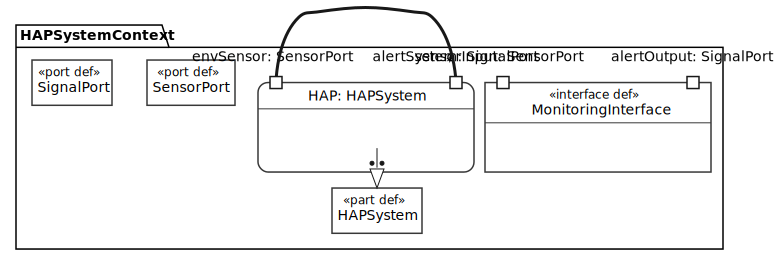

In [5]:
%viz  HAPSystemContext

In [6]:
package 'Port Example' {

    // Define an attribute for temperature
    attribute def Temp;

    // Define a part for Fuel
    part def Fuel;
 part def Vehicle;
    // Define an output port for Fuel Tank
    port def FuelOutPort {
        attribute temperature : Temp;  // Temperature attribute
        out item fuelSupply : Fuel;    // Fuel going out
        in item fuelReturn : Fuel;     // Returning fuel
    }

    // Define an input port for Engine
    port def FuelInPort {
        attribute temperature : Temp;  // Temperature attribute
        in item fuelSupply : Fuel;     // Fuel coming in
        out item fuelReturn : Fuel;    // Returning fuel
    }

    // Define Fuel Tank Assembly with an output fuel port
    part def FuelTankAssembly {
        port fuelTankPort : FuelOutPort;
    }

    // Define Engine with an input fuel port
    part def Engine {
        port engineFuelPort : FuelInPort;
    }
}


Package Port Example (023a8f5a-48db-4552-a4bf-a1182756e581)


In [4]:
package 'InterfaceExample' {
    
    // Import elements from the 'Port Example' package
    import 'Port Example'::*;

    // Define a part for Vehicle
   

    // Define an interface for Fuel System
    interface def FuelInterface {
        end supplierPort : FuelOutPort;   // Fuel supplier (Fuel Tank)
        end consumerPort : FuelInPort;    // Fuel consumer (Engine)
    }

    // Define a Vehicle instance with a fuel system connection
    part vehicle : Vehicle {
        part tankAssy : FuelTankAssembly;  // Fuel tank assembly
        part eng : Engine;                 // Engine component
        
        // Define the interface connection between the Fuel Tank and Engine
        interface : FuelInterface connect 
            supplierPort ::> tankAssy.fuelTankPort to 
            consumerPort ::> eng.engineFuelPort;
    } 
}


Package InterfaceExample (870617e7-03f6-4a1e-8506-79d4321778ee)


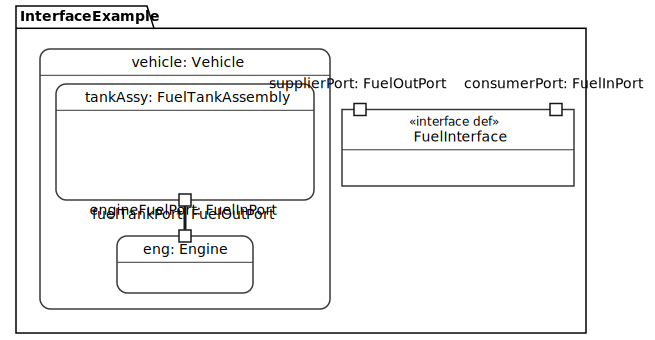

In [28]:
%viz InterfaceExample